In [1]:
#Challenge 1:
# Given the datasets for FIFA 19 and FIFA 21, visualize and show this:

# 1. Player with most rise and drop in potential
# 2. Player with most rise and drop in overall rating
# 3. New players in 21 and players present in 19, not present in 21
# 4. Nationality distribution of the 2021 players, per country
# 5. Anything else you might find interesting

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data19=pd.read_csv("FIFA-19.csv",index_col=0) # data19 shape is 18207 x 88.
data21=pd.read_excel('FIFA-21.xlsx')          # data21 shape is 17981 x 8.

In [2]:
# 1. Player with most rise and drop in potential

data_potential=pd.DataFrame()
data_overall=pd.DataFrame()
potential_dif=[]
overall_dif=[]

# First I will create a new DataFrame called data_potential, which is the DataFrame for FIFA21, 
# with the an extra column Potential difference. 

"""For Ex1 and Ex2 I iterrate over the first 1500 elements of the DataFrame FIFA19 and FIFA21 because it will take too 
much time for the results. My code is working and in case I want to run it to I can remove the method head(n=1500)"""


for index, row in data21.head(n=1500).iterrows():
    for ind, rows in data19.head(n=1500).iterrows():
        if row["player_id"]==rows["ID"]:
            a=row["potential"]-rows["Potential"]
            data_potential=data_potential.append(row, ignore_index = True)
            potential_dif.append(a)
data_potential['Potential difference'] = pd.Series(potential_dif, index=data_potential.index)
# print(data_potential)


# And now I will find Player with most rise and drop in potential

min_2=min(data_potential['Potential difference'])
max_2=max(data_potential['Potential difference'])
data_min2_potential=pd.DataFrame()
data_max2_potential=pd.DataFrame()

for index, row in data_potential.head(n=1500).iterrows():
    if int(row['Potential difference'])==min_2:
        data_min2_potential=data_min2_potential.append(row, ignore_index = True)
    if int(row['Potential difference'])==max_2:
        data_max2_potential=data_max2_potential.append(row, ignore_index = True)
print("The player whose potential dropped the most is")
print(data_min2_potential)       
print("The player whose potential rised the most is")
print(data_max2_potential) 


# 2. Player with most rise and drop in overall rating


# First I will create a new DataFrame called data_potential, which is the DataFrame for FIFA21, 
# with the an extra column Overall difference.

for index, row in data21.head(n=1500).iterrows():
    for ind, rows in data19.head(n=1500).iterrows():
        if row["player_id"]==rows["ID"]:
            a=row["overall"]-rows["Overall"]
            data_overall=data_overall.append(row, ignore_index = True)
            overall_dif.append(a)
data_overall['Overall difference'] = pd.Series(overall_dif, index=data_overall.index)       
# print(data_overall) 

# Find Player with most rise and drop in overall rating

min_1=min(data_overall["Overall difference"])
max_1=max(data_overall["Overall difference"])
data_min1_overall=pd.DataFrame()
data_max1_overall=pd.DataFrame()

for index, row in data_overall.head(n=1500).iterrows():
    if int(row["Overall difference"])==min_1:
        data_min1_overall=data_min1_overall.append(row, ignore_index = True)
    if int(row["Overall difference"])==max_1:
        data_max1_overall=data_max1_overall.append(row, ignore_index = True)

print("The player whose overall dropped the most is")        
print(data_min1_overall)       
print("The player whose overall rised the most is")
print(data_max1_overall)        


The player whose potential dropped the most is
   Potential difference   age  hits                 name nationality  overall  \
0                  -6.0  28.0  25.0                 Isco       Spain     85.0   
1                  -6.0  24.0  47.0        Marco Asensio       Spain     82.0   
2                  -6.0  26.0  12.0         Denis Suárez       Spain     79.0   
3                  -6.0  31.0   6.0        Ralf Fährmann     Germany     78.0   
4                  -6.0  23.0  27.0      Davide Calabria       Italy     76.0   
5                  -6.0  28.0   3.0      Fabián Balbuena    Paraguay     76.0   
6                  -6.0  27.0   0.0            Pere Pons       Spain     76.0   
7                  -6.0  25.0   3.0  Mohamed Elyounoussi      Norway     76.0   

   player_id   position  potential              team  
0   197781.0  CM|CAM|LW       85.0      Real Madrid   
1   220834.0      RW|LW       86.0      Real Madrid   
2   205192.0      LM|CM       80.0         RC Celta   
3  

In [4]:
# 3. New players in 21 and players present in 19, not present in 21
data_new_players21=pd.DataFrame()
data_players19_not21=pd.DataFrame()

""" Made a list with the unique player_id's for 19 and 21"""
list_players19_id=[]
list_players21_id=[]
for item in data19["ID"]:
    list_players19_id.append(item)

for item in data21["player_id"]:
    list_players21_id.append(item)

list_new_playes21_id=[]
list_players19_not_players21_id=[]

for item in list_players21_id:
    if item not in list_players19_id:
        list_new_playes21_id.append(item)
        
for item in list_players19_id:
    if item not in list_players21_id:
        list_players19_not_players21_id.append(item)   

data_new_players21=pd.DataFrame()
data_players19_not_players21=pd.DataFrame()
data_players19_not_players21=pd.DataFrame()
for index, row in data21.iterrows():
    for item in list_new_playes21_id:
        if item==row["player_id"]:
            data_new_players21=data_new_players21.append(row, ignore_index = True)
print("The new players in FIFA21 are")
print(data_new_players21)

for index, row in data19.iterrows():
    for item in list_players19_not_players21_id:
        if item==row["ID"]:
            data_players19_not_players21=data_players19_not_players21.append(row, ignore_index = True)
print("The players present in 19, not present in 21")
print(data_players19_not_players21)

The new players in FIFA21 are
       age  hits                      name           nationality  overall  \
0     28.0  17.0        José María Sildero               Uruguay     82.0   
1     28.0  12.0   Egidio Maestre Schetino               Uruguay     82.0   
2     28.0  20.0               Oswaldinato                Brazil     82.0   
3     24.0   6.0             Nuno Padrenda                Brazil     82.0   
4     31.0   3.0         Segundo Mandíquez               Ecuador     81.0   
5     28.0   3.0       Luis Roberto Dálves               Uruguay     81.0   
6     32.0   0.0       Saúl Marcelo Ardero               Uruguay     81.0   
7     36.0   0.0    Jaime Nicolás Frendado               Uruguay     81.0   
8     32.0   1.0             Tony Abranjes                Brazil     81.0   
9     32.0   4.0        Mauro Evidio Nérez               Uruguay     80.0   
10    36.0   4.0      Matías David Baldona               Uruguay     80.0   
11    32.0   1.0  Jorge Ezequiel Serendero    

The players present in 19, not present in 21
      Acceleration   Age  Aggression  Agility  Balance  BallControl Body Type  \
0             65.0  31.0        86.0     59.0     53.0         64.0    Normal   
1             87.0  28.0        46.0     92.0     87.0         86.0    Normal   
2             60.0  35.0        72.0     46.0     36.0         68.0      Lean   
3             76.0  32.0        81.0     75.0     62.0         83.0      Lean   
4             67.0  32.0        88.0     67.0     53.0         77.0      Lean   
5             65.0  34.0        61.0     77.0     69.0         88.0      Lean   
6             61.0  37.0        66.0     52.0     64.0         65.0    Normal   
7             83.0  34.0        47.0     87.0     90.0         88.0    Normal   
8             63.0  34.0        84.0     64.0     72.0         77.0    Normal   
9             95.0  23.0        60.0     94.0     92.0         83.0      Lean   
10            87.0  21.0        53.0     92.0     84.0         8

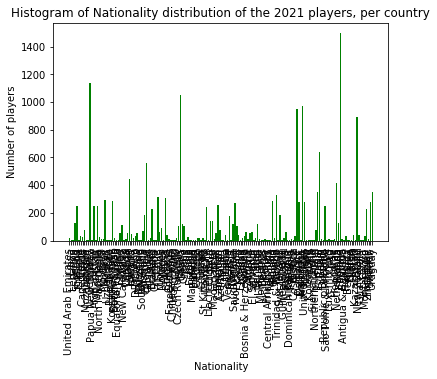

{'Brazil': 71.42281879194631, 'Germany': 66.79964850615114, 'Italy': 68.73940345368916, 'Uruguay': 68.13920454545455, 'Argentina': 69.1659793814433, 'France': 68.28586497890295, 'England': 65.25, 'Spain': 69.87488151658768}


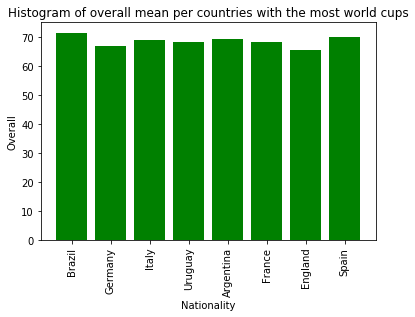

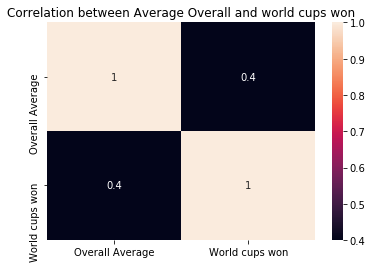

{'Portugal': 70.37321937321937, 'Spain': 69.87488151658768, 'Greece': 68.80952380952381, 'France': 68.28586497890295, 'Germany': 66.79964850615114, 'Denmark': 66.33818181818182, 'Netherlands': 68.09808612440192}


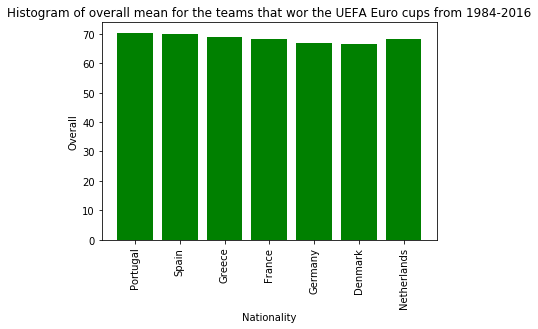

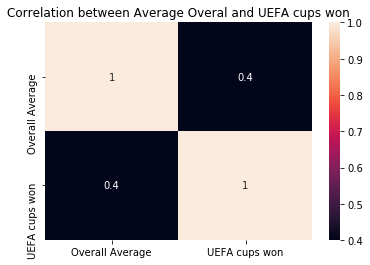

In [8]:
# 4. Nationality distribution of the 2021 players, per country

dict_players_per_country21={}

""" Made a list with the unique Nationalities for data21"""
list_nationalities21=[]
for item in data21["nationality"]:
    list_nationalities21.append(item)   
list_nationalities21=list(set(list_nationalities21))
# print(len(list_nationalities21))


dict_players_per_country21={}
for item in list_nationalities21:
    data=data21[data21["nationality"]==item]
    rows=data.shape[0]
    dict_players_per_country21[item]=rows
# print(dict_players_per_country21)    

plt.bar(dict_players_per_country21.keys(), dict_players_per_country21.values(), color='g')
plt.xticks(rotation=90)
plt.title('Histogram of Nationality distribution of the 2021 players, per country')
plt.xlabel('Nationality')
plt.ylabel('Number of players')
plt.show()



# 5. Anything else you might find interesting
# I want to check the mean overall value for fifa21 dataset for the teams with the most world cups
dict_world_cups_mean_overall={}
dict_world_cups_won={"Brazil":5,"Germany":4,"Italy":4,"Uruguay":2,"Argentina":2,"France":2,"England":1,"Spain":1}
list_world_cups_countries=["Brazil","Germany","Italy","Uruguay","Argentina","France","England","Spain"]

for item in list_world_cups_countries:
    data=data21[data21["nationality"]==item]
    data_mean=data["overall"].mean()
    dict_world_cups_mean_overall[item]=data_mean
print(dict_world_cups_mean_overall)   

plt.bar(dict_world_cups_mean_overall.keys(), dict_world_cups_mean_overall.values(), color='g')
plt.xticks(rotation=90)
plt.title('Histogram of overall mean per countries with the most world cups')
plt.xlabel('Nationality')
plt.ylabel('Overall')
plt.show()

# I want to check if there is a correlation between the Average Overall and the total world cups the teams have won
l1=[]
for value in dict_world_cups_mean_overall.values():
    l1.append(value)
l2=[]
for value in dict_world_cups_won.values():  
    l2.append(float(value))
  
df1=pd.DataFrame({"Overall Average":l1,"World cups won":l2})

l1=df1["Overall Average"]
l2=df1["World cups won"]

l1.corr(l2)
df1.corr()

corr=df1.corr()
ax = plt.axes()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
ax.set_title('Correlation between Average Overall and world cups won')
plt.show()

# The correlation is very low, because the Average overall we computed is related to 
# all the players with a specific Nationality and not with the 18 top 18 players of every National team.



# I want to check the mean overall value for fifa21 dataset for the teams that wor the UEFA Euro cups from 1984-2016
dict_uefa_cups_mean_overall={}
list_uefa_cups_countries=["Portugal","Spain" ,"Greece","France","Germany", "Denmark" ,"Netherlands"]
dict_uefa_cups_won={"Portugal":1,"Spain":2,"Greece":1,"France":2,"Germany":1, "Denmark":1,"Netherlands":1}
for item in list_uefa_cups_countries:
    data=data21[data21["nationality"]==item]
    data_mean=data["overall"].mean()
    dict_uefa_cups_mean_overall[item]=data_mean
print(dict_uefa_cups_mean_overall)   

plt.bar(dict_uefa_cups_mean_overall.keys(), dict_uefa_cups_mean_overall.values(), color='g')
plt.xticks(rotation=90)
plt.title('Histogram of overall mean for the teams that wor the UEFA Euro cups from 1984-2016')
plt.xlabel('Nationality')
plt.ylabel('Overall')
plt.show()


# I want to check if there is a correlation between the Average Overall and the total world cups the teams have won
l3=[]
for value in dict_uefa_cups_mean_overall.values():
    l3.append(value)
l4=[]
for value in dict_uefa_cups_won.values():  
    l4.append(float(value))

    
df2=pd.DataFrame({"Overall Average":l1,"UEFA cups won":l2})

l3=df2["Overall Average"]
l4=df2["UEFA cups won"]

l3.corr(l4)
df2.corr()

corr=df2.corr()
ax = plt.axes()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
ax.set_title('Correlation between Average Overal and UEFA cups won')
plt.show()

# The correlation is very low, because the Average overall we computed is related to 
# all the players with a specific Nationality and not with the 18 top 18 players of every National team.